In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats
import scipy.optimize
import numdifftools as nd
from numdifftools import Jacobian, Hessian
sns.set()

In [3]:
#!pip install numdifftools

In [4]:
pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
#df = pd.read_csv("https://raw.githubusercontent.com/Oliverkobaek/thesis_2020/master/Bresnahan/Bresnahan_data_2.csv")
#df = pd.read_csv("Bresnahan_data_full_inf.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Oliverkobaek/thesis_2020/master/Bresnahan/by%20markeder/Bresnahan_data_by.csv")


df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
# Fjerner København
#
#storbyer = [101, 147, 461, 751, 851]
  
#for i in storbyer:
#    df = df[df['Kommune'] != i]
    
    
#df = df[df['Kommune'] != 101]
#df = df[df['Kommune'] != 147]
#df = df[df['Kommune']]

#år = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
    

#df = df[(df['År'] != 2015) & (df['År'] !=  2016) & (df['År'] !=  2017) & (df['År'] !=  2018)]

df = df[(df['År'] != 2008) & (df['År'] !=  2009) & (df['År'] !=  2010) & (df['År'] !=  2011)& (df['År'] !=  2012)& (df['År'] !=  2013)& (df['År'] !=  2014)]
#df = df[(df['År'] == 2017)] & (df['År'] !=  2015)

df['logbefolkning'] = np.log(df['By_befolkning'])
df['logmarkedsvalue'] = df['markedsvaerdix']/1000000 #np.log()
df['logindkomst'] = df['samlet_ind']/100000 #np.log()

C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [8]:
df

,Kommune,by,By_befolkning,ALDER,d65,d17,samlet_ind,Besk,Besk1864,DK,Befolkning,markedsvaerdix,yderkom,År,antal_apo,logbefolkning,logmarkedsvalue,logindkomst
1945,101,København,580184,35.38,0.10,0.18,203077.10,0.54,0.71,0.76,591481,1768450.97,0,2015,21,13.27,1.77,2.03
1946,147,Frederiksberg,106653,38.84,0.17,0.17,230605.31,0.52,0.75,0.82,104481,2245134.86,0,2015,5,11.58,2.25,2.31
1947,230,Rudersdal,41094,42.53,0.22,0.23,290548.90,0.48,0.79,0.89,55739,2781844.23,0,2015,3,10.62,2.78,2.91
1948,240,Ølstykke-Stenløse,24692,40.07,0.18,0.25,222004.35,0.52,0.83,0.92,42773,1454213.61,0,2015,1,10.11,1.45,2.22
1949,240,Veksø,1873,40.07,0.18,0.25,222004.35,0.52,0.83,0.92,42773,1454213.61,0,2015,0,7.54,1.45,2.22
1950,461,Odense,187593,38.83,0.17,0.19,161808.69,0.46,0.67,0.85,198972,1249525.25,0,2015,11,12.14,1.25,1.62
1951,461,Fraugde,3435,38.83,0.17,0.19,161808.69,0.46,0.67,0.85,198972,1249525.25,0,2015,1,8.14,1.25,1.62
1952,751,Aarhus,261570,37.12,0.14,0.19,182544.86,0.50,0.69,0.84,330639,2290217.60,0,2015,7,12.47,2.29,1.83
1953,751,Mårslet,4877,37.12,0.14,0.19,182544.86,0.50,0.69,0.84,330639,2290217.60,0,2015,0,8.49,2.29,1.83
1954,751,Solbjerg,3551,37.12,0.14,0.19,182544.86,0.50,0.69,0.84,330639,2290217.60,0,2015,0,8.17,2.29,1.83


In [9]:
def V(df, Ni, alpha=np.ones(5), beta=np.ones(5)):
    """Per-capita variable profit
    
    df: data
    Ni: number of incumbents in market i
    alpha: alpha parameters
    beta: beta parameter
    """
    n = np.min([5, Ni])
#     n = Ni
    a = 0
    for i in range(1,n):
        a = a + alpha[i]
    

    Z = np.c_[df.d65, df.d17, df.logindkomst, df.Besk1864, df.DK]# np.log()

    # W = df.LANDV
    # X = np.c_[W, Z]

    X = np.c_[Z]
    
    
    profit = alpha[0] + X @ beta - a
    return profit

def F(df, Ni, gamma=np.ones(5)):
    n = np.min([5, Ni])
#     n = Ni
    g = 0
    # gamma 2 through gamma 5 (indices 1 through 4)
    for i in range(1,n):
        g = g + gamma[i]

    fixed_cost = gamma[0] + gamma[5]*df.logmarkedsvalue + g
    return fixed_cost

#def S_func(df, lam):
def S_func(df, lam): #, lam
    S =   lam * df.logbefolkning #np.log() #
    return S

#def neg_log_lik(theta=np.ones(19), market='TIRE', df=None):
def neg_log_lik(theta=np.ones(17), market='antal_apo', df=df):#, df=None):
    lam = theta[0]
    beta = theta[1:6]
    alpha = theta[6:11]
    gamma = theta[11:17]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    Phi = scipy.stats.norm.cdf
    
    S = S_func(df, lam) #, lam

    
    P = [0] * 6
    Pi_bar = lambda N: S * V(df, N, alpha=alpha, beta=beta) - F(df, N, gamma=gamma)
    P[0] = np.log( 1 - Phi(Pi_bar(0)) )
    P[5] = np.log( Phi(Pi_bar(5)) )
    for i in range(1,5):
        P[i] = np.log( Phi(Pi_bar(i)) - Phi(Pi_bar(i+1)) )

        
    for i in range(6):
        P[i][P[i] == -np.inf] = -100000000
    log_lik = 0 
    for i in range(5):
        log_lik = log_lik + np.sum(P[i] * (df[market] == i))
    log_lik = log_lik + np.sum(P[5] * (df[market] >= 5))
    return -log_lik


def theta_to_param_dict(theta):
    lam = theta[0]
    beta = theta[1:6]
    alpha = theta[6:11]
    gamma = theta[11:17]
#    beta = theta[0:5]
#    alpha = theta[5:10]
#    gamma = theta[10:16]
    
    
    d = {'lam': lam, 'beta': beta, 'alpha': alpha, 'gamma': gamma, 'theta': theta} 
    return d

In [10]:
theta0 = np.ones(17) * 0.1
neg_log_lik(df=df, theta=theta0)

2855.74287981231

In [11]:
%%time
ba = [-np.inf] * 6
bb = [0] * 10
lower_bounds = [*ba, *bb, -np.inf]
upper_bounds = [np.inf] * 17
bounds = list(zip(lower_bounds, upper_bounds))


theta0 = np.ones(17) * 0.1
nll = lambda theta: neg_log_lik(theta=theta, df=df)
out = scipy.optimize.minimize(nll, theta0, bounds=bounds,
    options={'disp': False, 'maxiter': 10000}
    )

C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log


Wall time: 2min 41s


In [12]:
out

      fun: 969.9140157083277
 hess_inv: <17x17 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.15072601, -0.45864681,  0.41748081,  0.27422402,  0.05118181,
       -0.21361757,  0.09342784,  3.95763209,  1.16683623,  0.89921741,
       -0.34852974,  0.01857643,  1.30310127, -0.41925432,  0.14809984,
       -0.62741492, -0.23795792])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 13716
      nit: 591
   status: 0
  success: True
        x: array([ 6.94302696e-02,  1.47845526e+00,  5.81448476e-01, -2.06132979e+00,
        3.47161440e+00,  5.75580903e+00,  2.26511678e+01,  0.00000000e+00,
        0.00000000e+00,  2.16947013e-02,  3.16743943e-01,  1.48542461e+01,
        3.36737553e+00,  1.04149102e+00,  7.54618825e-01,  2.66473870e-01,
        1.51447827e-01])

In [13]:
Hfun = nd.Hessian(nll, full_output=True)
hessian_nd, info= Hfun(out['x'])
se = np.sqrt(np.diag(np.linalg.inv(hessian_nd)))
results = pd.DataFrame({'parameters':out['x'],'std err':se})
results.index=['lambda','beta_1','beta_2','beta_3','beta_4','beta_5','alpha_1','alpha_2','alpha_3','alpha_4','alpha_5','gamma_1','gamma_2','gamma_3','gamma_4','gamma_5', 'gamma_6'] #,'gamma6'  


C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in log
C:\Users\Camilla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
results

,parameters,std err
lambda,0.07,nan
beta_1,1.48,2.84
beta_2,0.58,6.06
beta_3,-2.06,0.50
beta_4,3.47,3.13
beta_5,5.76,1.53
alpha_1,22.65,2.00
alpha_2,0.00,1.87
alpha_3,0.00,2.12
alpha_4,0.02,3.07


In [19]:
hat_theta = theta_to_param_dict(out.x)

In [20]:
hat_theta

{'lam': 0.06943026964384359,
 'beta': array([ 1.47845526,  0.58144848, -2.06132979,  3.4716144 ,  5.75580903]),
 'alpha': array([2.26511678e+01, 0.00000000e+00, 0.00000000e+00, 2.16947013e-02,
        3.16743943e-01]),
 'gamma': array([14.85424614,  3.36737553,  1.04149102,  0.75461882,  0.26647387,
         0.15144783]),
 'theta': array([ 6.94302696e-02,  1.47845526e+00,  5.81448476e-01, -2.06132979e+00,
         3.47161440e+00,  5.75580903e+00,  2.26511678e+01,  0.00000000e+00,
         0.00000000e+00,  2.16947013e-02,  3.16743943e-01,  1.48542461e+01,
         3.36737553e+00,  1.04149102e+00,  7.54618825e-01,  2.66473870e-01,
         1.51447827e-01])}

In [21]:
def calcS(df, theta):
    d = theta_to_param_dict(theta)
    S_grid = np.zeros(5)
    
    dfm = df.mean()
    for i in range(5):
        n = i + 1
        S_grid[i] = F(dfm, n, d['gamma']) / V(dfm, n, d['alpha'], d['beta'])
        print(F(dfm, n, d['gamma']) )
        print(V(dfm, n, d['alpha'], d['beta']))
    return S_grid

S_vals = calcS(df, out.x)

15.038861263004625
[27.1976223]
18.406236793325004
[27.1976223]
19.447727814127397
[27.1976223]
20.20234663892555
[27.17592759]
20.46882050862822
[26.85918365]


In [22]:
S_vals

array([0.55294765, 0.67675904, 0.7150525 , 0.74339124, 0.76207903])

In [23]:
table5A_left = pd.DataFrame({'Apoteker':S_vals}).T
table5A_left.columns = ['S_1', 'S_2', 'S_3', 'S_4', 'S_5']
table5A_left

,S_1,S_2,S_3,S_4,S_5
Apoteker,0.55,0.68,0.72,0.74,0.76


In [24]:
a = [S_vals[i+1]/S_vals[i] * ((i+1)/(i+2)) for i in range(4)]
table5A_right = pd.DataFrame(a).T
table5A_right.columns = ['s2/s1', 's3/s2', 's4/s3', 's5/s4']

In [25]:
table5A_right

,s2/s1,s3/s2,s4/s3,s5/s4
0,0.61,0.70,0.78,0.82


#### Q6. Replicate Figure 4 for "Tire Dealers."

In [26]:
SN_S5_ratio = S_vals[5-1]* np.arange(1,5+1) / (S_vals * 5)

In [27]:
SN_S5_ratio

array([0.27564238, 0.45042857, 0.63945992, 0.82011084, 1.        ])

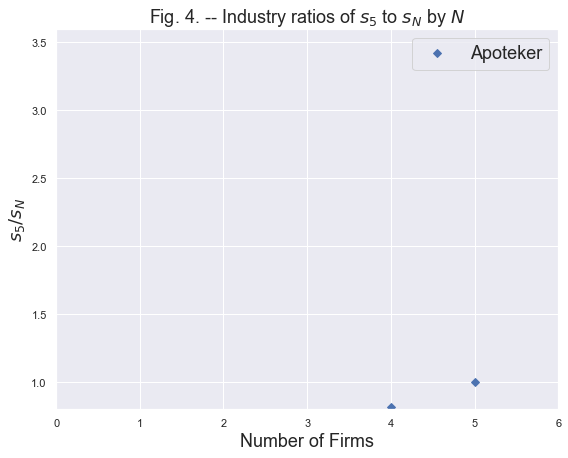

In [28]:
BIG = 18
fig = plt.figure(figsize=(9,7))
plt.plot([1,2,3,4,5], SN_S5_ratio, 'D', label='Apoteker')
ax = fig.get_axes()[0]
plt.legend(fontsize=BIG)
plt.xlim(0,6)
plt.ylim(0.8, 3.6)
plt.title('Fig. 4. -- Industry ratios of $s_5$ to $s_N$ by $N$', fontsize=BIG)
plt.xlabel('Number of Firms', fontsize=BIG)
plt.ylabel('$s_5/s_N$', fontsize=BIG);
# ax.set_ylabel('$s_5/s_N$', fontsize=40)